## Harmony Py Library
### Variable Coverages Example

In [1]:
import helper
import json
from IPython.display import display, JSON
import sys
sys.path.append('..')
import rasterio
import rasterio.plot
import netCDF4 as nc

# Install harmony-py requirements.  Not necessary if you ran `pip install harmony-py` in your kernel  
!{sys.executable} -m pip install -q -r ../requirements/core.txt

from harmony import BBox, Client, Variable, VariableCoveragesRequest, Environment

#### Submit a Variable Coverages request

In [2]:
harmony_client = Client(env=Environment.LOCAL)

#var1 = Variable(id='V1233801695-EEDTEST')
#var2 = Variable(id='V1233801696-EEDTEST')
var1 = Variable(id='red')
var2 = Variable(id='blue')

variable_request = VariableCoveragesRequest(
    variables=[var1, var2],
    spatial=BBox(-140, 20, -50, 40),
    crs='EPSG:31975',
    format='image/png',
    max_results=1
)

job_id = harmony_client.submit(variable_request)

#### Download and show the png file in result

001_00_7f00ff_global_regridded_subsetted.nc.png

  001_00_7f00ff_global_regridded_subsetted.nc.png


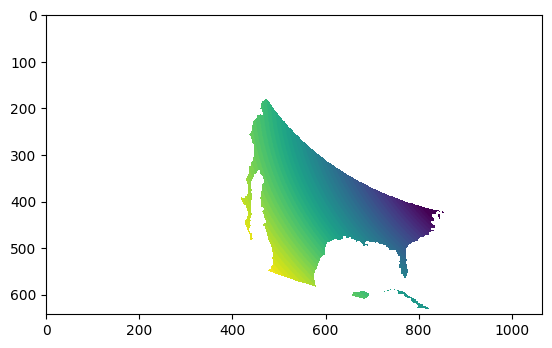

In [3]:
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

for filename in [f.result() for f in harmony_client.download_all(job_id)]:
    if filename.endswith("png"):
        helper.show_result(filename)

In [4]:
var3=Variable(id='ozone')

ozone_variable_request = VariableCoveragesRequest(
    variables=[var3],
    #spatial=BBox(-140, 20, -50, 40),
    #crs='EPSG:31975',
    #format='image/png',
    max_results=2
)

ozone_job_id = harmony_client.submit(ozone_variable_request)

In [5]:
harmony_client.wait_for_processing(ozone_job_id, show_progress=True)

 [ Processing: 100% ] |###################################################| [|]


In [6]:
data = harmony_client.result_json(ozone_job_id)
JSON(data)

<IPython.core.display.JSON object>

In [34]:
# urls = harmony_client.result_urls(salinity_job_id, show_progress=True)
# urls

<generator object Client.result_urls at 0x1309a42e0>

In [7]:
results = harmony_client.download_all(ozone_job_id, directory='/tmp', overwrite=True)
file_names = [f.result() for f in results]
file_names

/tmp/SNDR.J1.CRIMSS.20180217T0000.m06.g001.L2_CLIMCAPS_RET.std.v02_28.G.200221153452_mol_lay_o3_mol_lay_subsetted.nc4
/tmp/SNDR.J1.CRIMSS.20180217T0018.m06.g004.L2_CLIMCAPS_RET.std.v02_28.G.200221153452_mol_lay_o3_mol_lay_subsetted.nc4


['/tmp/SNDR.J1.CRIMSS.20180217T0000.m06.g001.L2_CLIMCAPS_RET.std.v02_28.G.200221153452_mol_lay_o3_mol_lay_subsetted.nc4',
 '/tmp/SNDR.J1.CRIMSS.20180217T0018.m06.g004.L2_CLIMCAPS_RET.std.v02_28.G.200221153452_mol_lay_o3_mol_lay_subsetted.nc4']

In [8]:
ds = nc.Dataset(file_names[0])
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    keywords: ATMOSPHERE > ATMOSPHERIC TEMPERATURE > UPPER AIR TEMPERATURE, ATMOSPHERE > ATMOSPHERIC WATER VAPOR > WATER VAPOR
    Conventions: CF-1.6, ACDD-1.3
    source: CrIS and ATMS instrument telemetry
    processing_level: 2
    product_name_type_id: L2_CLIMCAPS_RET_NSR
    comment: 
    acknowledgment: Support for this research was provided by NASA.
    standard_name_vocabulary: CF Standard Name Table v28
    project: Sounder SIPS
    product_name_project: SNDR
    geospatial_bounds_crs: EPSG:4326
    time_coverage_duration: P0000-00-00T00:06:00
    product_name_duration: m06
    creator_type: institution
    keywords_vocabulary: GCMD:GCMD Keywords
    platform: JPSS-1 > Joint Polar Satellite System - 1
    platform_vocabulary: GCMD:GCMD Keywords
    product_name_platform: J1
    instrument: CRIMSS > Cross-track Infrared and Advanced Technology Microwave Sounders, CrIS > Cross-track Infrared S

In [37]:
ozone = ds[''][:]

IndexError: anc_sss not found in /

In [28]:
for var in ds.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
int32 lat(time)
    long_name: latitude
    standard_name: latitude
    units: degrees_north
    quality_flag: orb_state_flag_rest
    scale_factor: 1e-06
    comment: Positive latitude is North latitude, negative latitude is South latitude. See Jason-1 User Handbook.
unlimited dimensions: 
current shape = (2707,)
filling on, default _FillValue of -2147483647 used
<class 'netCDF4._netCDF4.Variable'>
int32 lon(time)
    long_name: longitude
    standard_name: longitude
    units: degrees_east
    quality_flag: orb_state_flag_rest
    scale_factor: 1e-06
    comment: East longitude relative to Greenwich meridian. See Jason-1 User Handbook.
unlimited dimensions: 
current shape = (2707,)
filling on, default _FillValue of -2147483647 used
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    _FillValue: nan
    long_name: time (sec. since 2000-01-01)
    standard_name: time
    calendar: gregorian
    tai_utc_difference: 33.0
    leap_second: 0000-00